In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Pearson correaltion
from scipy.stats.stats import pearsonr

In [8]:
Households = pd.read_csv("~/Downloads/dta_at_hh (1).csv")

In [9]:
Products = pd.read_csv("~/Downloads/dta_at_prod_id (1).csv")

In [10]:
Trips = pd.read_csv("~/Downloads/dta_at_TC (1).csv")

In [11]:
Purchases= pd.read_csv("~/Downloads/dta_at_TC_upc (1).csv")

## c.1 Is the number of shopping trips per month correlated with the average number of items

In [12]:
Trips['hh_YM'] = Trips['TC_date'].str[0:7]

In [13]:
Trips.head()

,Unnamed: 0,hh_id,TC_date,TC_retailer_code,TC_retailer_code_store_code,TC_retailer_code_store_zip3,TC_total_spent,TC_id,hh_YM
0,0,2000000,2003-12-29,248,4125185,365.0,3.97,20576,2003-12
1,1,2000000,2003-12-30,248,4125185,365.0,58.48,38829,2003-12
2,2,2000000,2004-01-02,248,4125185,365.0,132.58,92523,2004-01
3,3,2000000,2004-01-05,6999,0,NaN,19.65,155187,2004-01
4,4,2000000,2004-01-09,248,4125185,365.0,98.69,221705,2004-01


In [14]:
Purchases.head()

,Unnamed: 0,TC_id,quantity_at_TC_prod_id,total_price_paid_at_TC_prod_id,coupon_value_at_TC_prod_id,deal_flag_at_TC_prod_id,prod_id
0,0,1030138,1,0.99,0.0,0,1.000012e+14
1,1,1030024,1,1.00,0.0,1,1.000021e+14
2,2,1029953,1,2.14,0.0,0,1.000047e+14
3,3,1029859,2,1.78,0.0,1,1.000051e+14
4,4,1029859,8,2.00,0.0,1,1.000027e+14


In [15]:
Purchase_agg = Purchases[['TC_id','quantity_at_TC_prod_id']].groupby('TC_id').sum()
Purchase_agg.reset_index(inplace=True)
Purchase_agg.head()

,TC_id,quantity_at_TC_prod_id
0,233,3
1,234,1
2,235,1
3,236,13
4,237,1


In [16]:
Trips_q1 = pd.merge(Trips[['hh_id','hh_YM', 'TC_id']], Purchase_agg, on = 'TC_id', how='inner')
Trips_q1.head()

,hh_id,hh_YM,TC_id,quantity_at_TC_prod_id
0,2000000,2003-12,20576,2
1,2000000,2003-12,38829,13
2,2000000,2004-01,92523,55
3,2000000,2004-01,155187,5
4,2000000,2004-01,221705,43


In [17]:
Trips_q1_1 = Trips_q1.groupby(['hh_id','hh_YM']).agg({'quantity_at_TC_prod_id':'sum', 'TC_id':'count'}).reset_index()

In [18]:
Trips_q1_2 = Trips_q1_1.groupby(['hh_id']).agg({'quantity_at_TC_prod_id':'sum','TC_id':'sum', 'hh_YM':'count'}).reset_index()

In [19]:
Trips_q1_2.head()

,hh_id,quantity_at_TC_prod_id,TC_id,hh_YM
0,2000000,2106,123,13
1,2000021,515,141,12
2,2000038,961,236,13
3,2000049,970,169,13
4,2000076,818,126,12


In [20]:
Trips_q1_2['num_tc_monthly'] = Trips_q1_2['TC_id']/Trips_q1_2['hh_YM']
Trips_q1_2['avg_item_purchased'] = Trips_q1_2['quantity_at_TC_prod_id']/Trips_q1_2['TC_id']

In [21]:
Trips_q1_2.head()

,hh_id,quantity_at_TC_prod_id,TC_id,hh_YM,num_tc_monthly,avg_item_purchased
0,2000000,2106,123,13,9.461538,17.121951
1,2000021,515,141,12,11.750000,3.652482
2,2000038,961,236,13,18.153846,4.072034
3,2000049,970,169,13,13.000000,5.739645
4,2000076,818,126,12,10.500000,6.492063


Text(0, 0.5, 'avg_item_purchased')

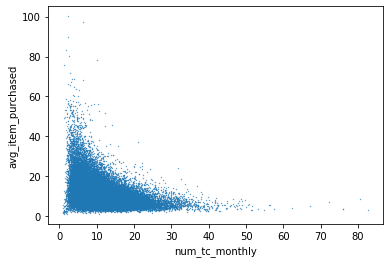

In [22]:
plt.scatter(Trips_q1_2['num_tc_monthly'], Trips_q1_2['avg_item_purchased'],s = 0.1)
plt.xlabel('num_tc_monthly')
plt.ylabel('avg_item_purchased')


In [23]:
import numpy as np
from scipy.stats import kde
from mpl_toolkits.mplot3d import Axes3D

In [24]:
# sample from original data
Trips_q1_2_sample = Trips_q1_2.sample(frac = 0.25, random_state= 1)
Trips_q1_2_sample.head()

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=100
df = Trips_q1_2_sample
k = kde.gaussian_kde([df['num_tc_monthly'],df['avg_item_purchased']])
xi, yi = np.mgrid[ df['num_tc_monthly'].min():df['num_tc_monthly'].max():nbins*1j, df['avg_item_purchased'].min():df['avg_item_purchased'].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

In [25]:
# Transform it in a dataframe
data=pd.DataFrame({'x': xi.flatten(), 'y': yi.flatten(), 'z': zi })

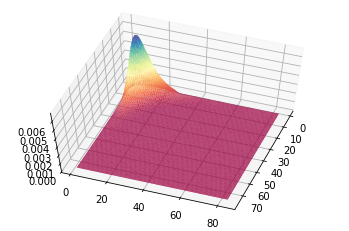

In [26]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(data.x, data.y, data.z, cmap=plt.cm.Spectral, linewidth=0.2)
# Adapt angle, first number is up/down, second number is right/left
ax.view_init(60, 20)

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0.92, 'Number of shopping trips vs average items purchased')

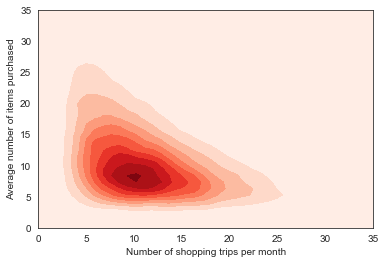

In [59]:
sns.kdeplot(Trips_q1_2['num_tc_monthly'], Trips_q1_2['avg_item_purchased'], cmap="Reds", shade=True)
plt.ylim(0, 35)
plt.xlim(0, 35)
plt.xlabel('Number of shopping trips per month')
plt.ylabel('Average number of items purchased')
ax.set_title('Number of shopping trips vs average items purchased',fontsize=12,color='black')

In [107]:
### Pearson correlation coefficient and the p-value
pearsonr(Trips_q1_2['num_tc_monthly'], Trips_q1_2['avg_item_purchased'])

(-0.3878260800905549, 0.0)

## c.2 Is the average price paid per item correlated with the number of items purchased?

In [39]:
Purchase1 = Purchases[['TC_id','quantity_at_TC_prod_id','total_price_paid_at_TC_prod_id']].groupby('TC_id').sum()
Purchase1.reset_index(inplace=True)
Purchase1.head()

,TC_id,quantity_at_TC_prod_id,total_price_paid_at_TC_prod_id
0,233,3,2.97
1,234,1,1.89
2,235,1,1.77
3,236,13,51.76
4,237,1,7.39


In [40]:
Trips_q2 = pd.merge(Trips[['hh_id','TC_id']], Purchase1, on = 'TC_id', how='inner')
Trips_q2.head()

,hh_id,TC_id,quantity_at_TC_prod_id,total_price_paid_at_TC_prod_id
0,2000000,20576,2,3.68
1,2000000,38829,13,32.96
2,2000000,92523,55,90.90
3,2000000,155187,5,15.25
4,2000000,221705,43,74.03


In [41]:
Trips_q2_1 = Trips_q2.groupby(['hh_id']).agg({'quantity_at_TC_prod_id':'sum', 'total_price_paid_at_TC_prod_id':'sum'}).reset_index()
Trips_q2_1.head()

,hh_id,quantity_at_TC_prod_id,total_price_paid_at_TC_prod_id
0,2000000,2106,3680.28
1,2000021,515,1853.00
2,2000038,961,3486.06
3,2000049,970,4412.97
4,2000076,818,2302.02


In [42]:
Trips_q2_1['avg_value'] = Trips_q2_1['total_price_paid_at_TC_prod_id']/Trips_q2_1['quantity_at_TC_prod_id']
Trips_q2_1.head()

,hh_id,quantity_at_TC_prod_id,total_price_paid_at_TC_prod_id,avg_value
0,2000000,2106,3680.28,1.747521
1,2000021,515,1853.00,3.598058
2,2000038,961,3486.06,3.627534
3,2000049,970,4412.97,4.549454
4,2000076,818,2302.02,2.814205


(0, 10)

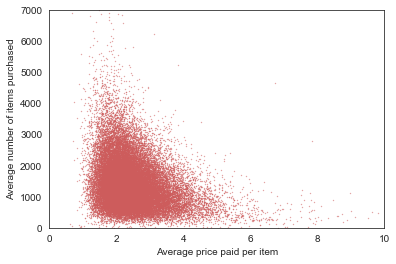

In [68]:
plt.scatter(Trips_q2_1['avg_value'], Trips_q1_2['quantity_at_TC_prod_id'],s = 0.1, alpha = .8, color = "indianred")
plt.xlabel('Average price paid per item')
plt.ylabel('Average number of items purchased')
plt.ylim(0, 7000)
plt.xlim(0, 10)

In [106]:
### Pearson correlation coefficient and the p-value
pearsonr(Trips_q2_1['avg_value'], Trips_q1_2['quantity_at_TC_prod_id'])

(-0.274864891505468, 0.0)